In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sys
sys.path.append("../scripts")

import preprocessing as dp
import data_extraction as de
import exploratory_analysis as eda

In [2]:
df = de.load_data('../data/csv.csv')

Data Loaded Successfully


In [3]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,3/1/2015 0:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0
1,145249,12827,5/1/2015 0:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0
2,145249,12827,7/1/2015 0:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0
3,145255,12827,5/1/2015 0:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0
4,145255,12827,7/1/2015 0:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0


In [4]:
df.shape

(1000098, 52)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [6]:
# Provides unique value in every single colummn
# Useful in Identifying columns that have the same value entirely and columns that don't have any unique values
# This columns dosn't offer any significant information to the analysis. 
df.nunique()

UnderwrittenCoverID         116532
PolicyID                      7000
TransactionMonth                23
IsVATRegistered                  2
Citizenship                      4
LegalType                        6
Title                            5
Language                         1
Bank                            11
AccountType                      3
MaritalStatus                    3
Gender                           3
Country                          1
Province                         9
PostalCode                     888
MainCrestaZone                  16
SubCrestaZone                   45
ItemType                         1
mmcode                         427
VehicleType                      5
RegistrationYear                25
make                            46
Model                          411
Cylinders                        7
cubiccapacity                  122
kilowatts                       82
bodytype                        13
NumberOfDoors                    6
VehicleIntroDate    

In [7]:
## Intialize The Datapreproccessing class
dp = dp.DataPreprocessing(df)

In [8]:
# Change the TranscationMonth and VehicleIntroDate column to datetime data type
dp.to_datetime()

d:\Personal Files\KIAM Notebooks\KIAM Week3\notebooks\../scripts\preprocessing.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data['VehicleIntroDate'] = pd.to_datetime(self.data['VehicleIntroDate'], errors='coerce')


In [9]:
# Drop columns that are not necessary for the analysis
dp.drop_columns()

In [10]:
# duplicated values
df.duplicated().sum()

np.int64(766)

In [11]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [12]:
# Handle Missing values

### Univariate Analysis 

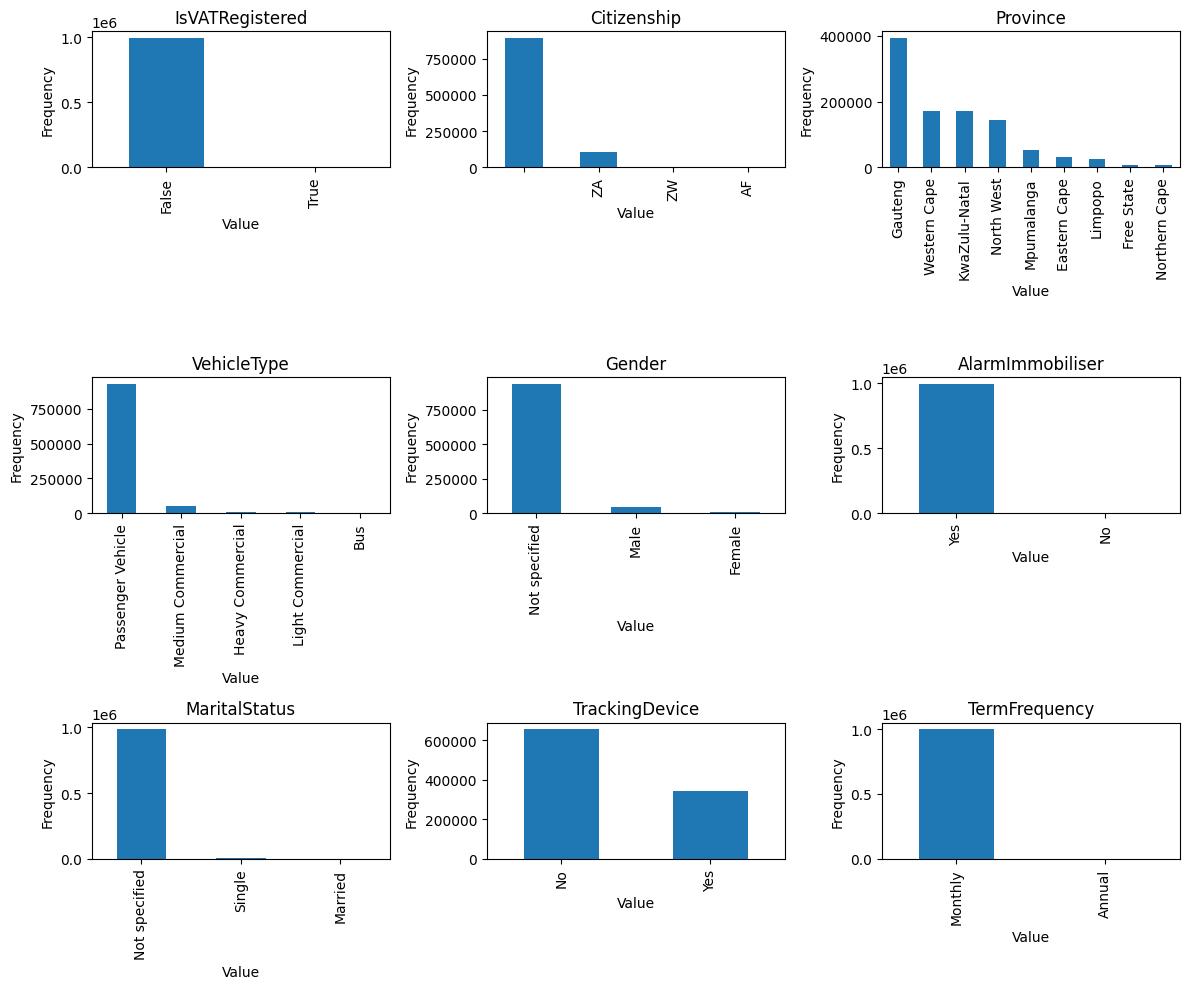

In [13]:
# Plot a barplot for categorical datas
dp.categorical_plot_1()

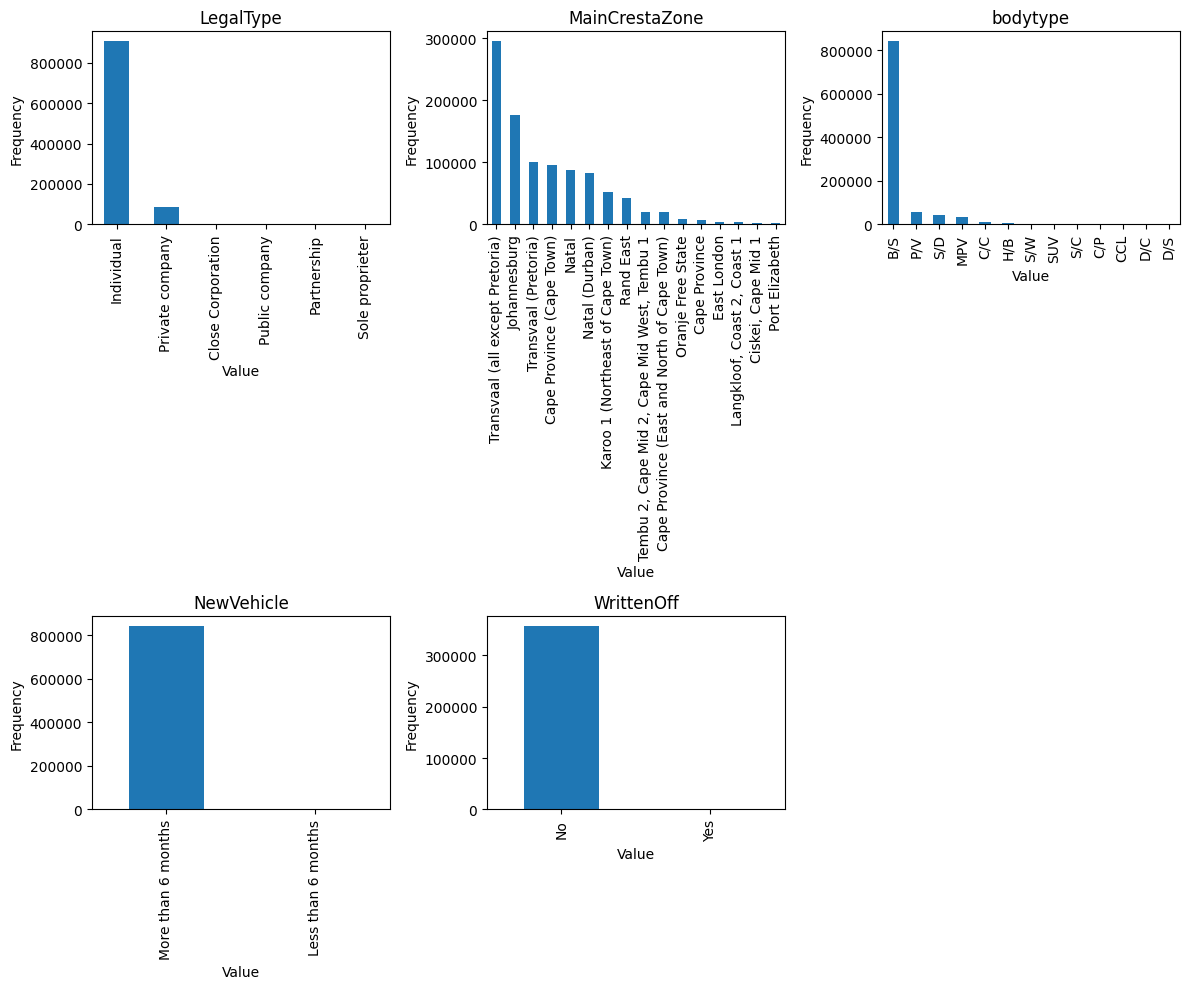

In [14]:
# Categrical bar plot 2
dp.categorical_plot_2()

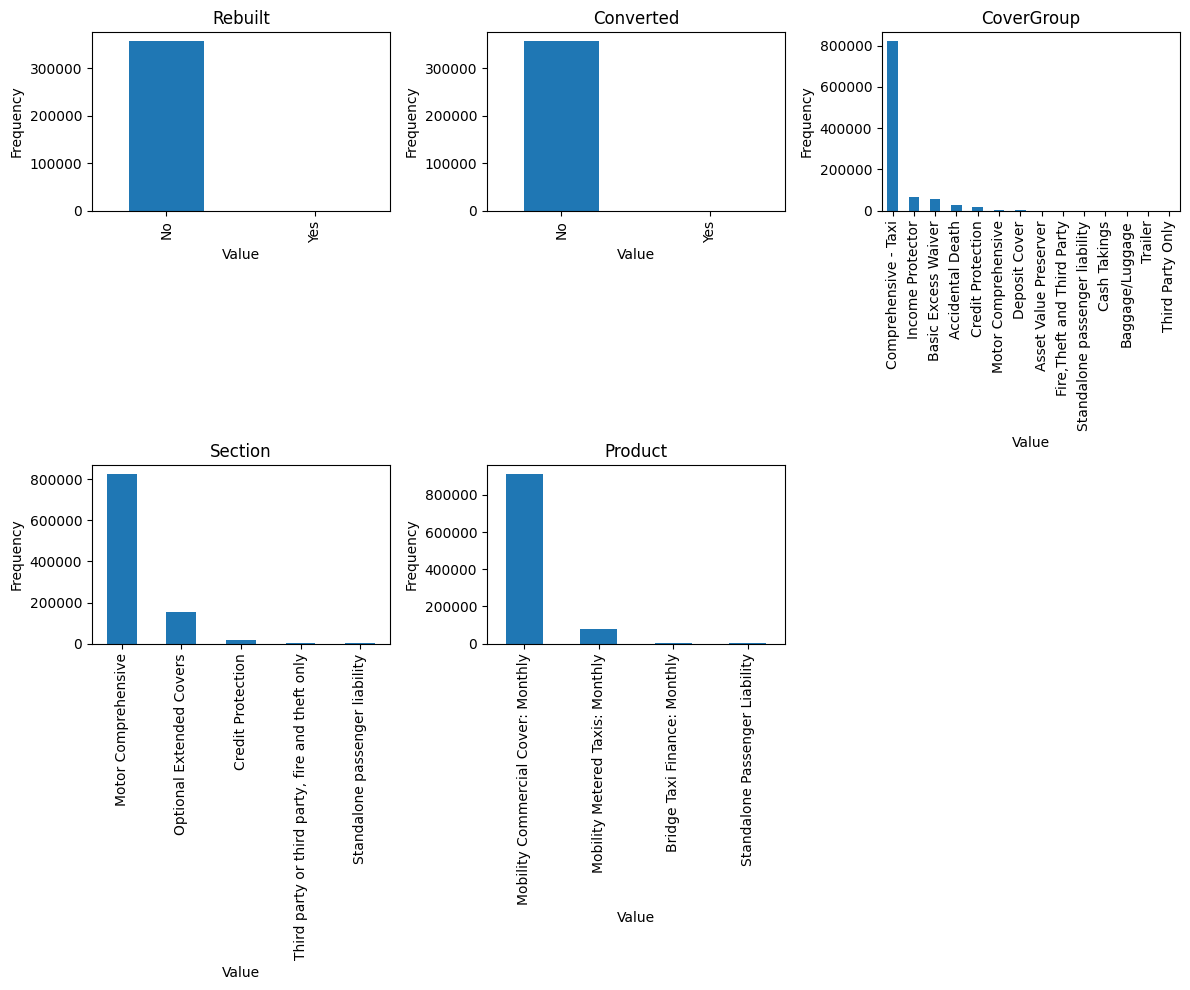

In [15]:
# Categrical bar plot 3
dp.categorical_plot_3()

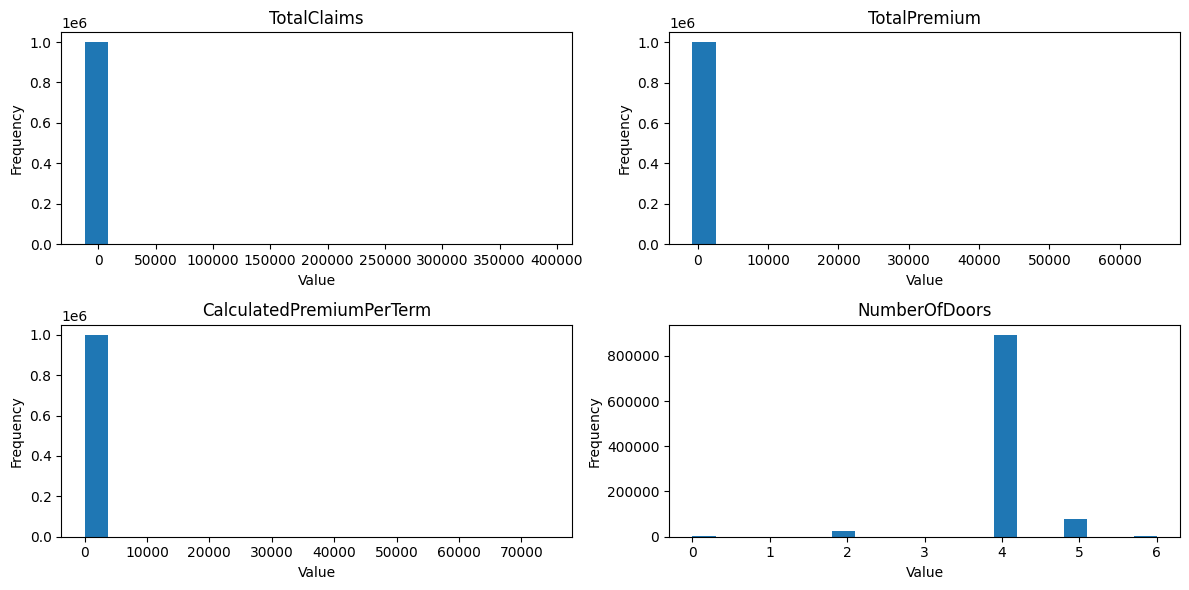

In [16]:
## Numerical columns distribution
dp.numerical_dist()

In [17]:
# Identify Missing values
df.isnull().sum()

UnderwrittenCoverID              0
PolicyID                         0
TransactionMonth                 0
IsVATRegistered                  0
Citizenship                      0
LegalType                        0
MaritalStatus                 8259
Gender                        9536
Province                         0
PostalCode                       0
MainCrestaZone                   0
SubCrestaZone                    0
VehicleType                    552
RegistrationYear                 0
make                           552
bodytype                       552
NumberOfDoors                  552
AlarmImmobiliser                 0
TrackingDevice                   0
NewVehicle                  153295
WrittenOff                  641283
Rebuilt                     641283
Converted                   641283
SumInsured                       0
TermFrequency                    0
CalculatedPremiumPerTerm         0
ExcessSelected                   0
CoverCategory                    0
CoverType           

In [18]:
#Missing values replaced with appropriate values
dp.handle_missing_values()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,MaritalStatus,Gender,Province,PostalCode,...,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Not specified,Not specified,Gauteng,1459,...,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,21.929825,0
1,145249,12827,2015-05-01,True,,Close Corporation,Not specified,Not specified,Gauteng,1459,...,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,21.929825,0
2,145249,12827,2015-07-01,True,,Close Corporation,Not specified,Not specified,Gauteng,1459,...,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,0.000000,0
3,145255,12827,2015-05-01,True,,Close Corporation,Not specified,Not specified,Gauteng,1459,...,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,512.848070,0
4,145255,12827,2015-07-01,True,,Close Corporation,Not specified,Not specified,Gauteng,1459,...,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01,False,ZW,Individual,Single,Male,Western Cape,7493,...,Monthly,395.8481,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,347.235175,0
1000094,31520,389,2015-06-01,False,ZW,Individual,Single,Male,Western Cape,7493,...,Monthly,395.8481,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,347.235175,0
1000095,31520,389,2015-08-01,False,ZW,Individual,Single,Male,Western Cape,7493,...,Monthly,395.8481,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,347.235175,0
1000096,31519,389,2014-07-01,False,ZW,Individual,Single,Male,Western Cape,7493,...,Monthly,2.6391,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,2.315000,0


In [19]:
# Check for missing values
df.isnull().sum()

UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
MaritalStatus               0
Gender                      0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
VehicleType                 0
RegistrationYear            0
make                        0
bodytype                    0
NumberOfDoors               0
AlarmImmobiliser            0
TrackingDevice              0
NewVehicle                  0
WrittenOff                  0
Rebuilt                     0
Converted                   0
SumInsured                  0
TermFrequency               0
CalculatedPremiumPerTerm    0
ExcessSelected              0
CoverCategory               0
CoverType                   0
CoverGroup                  0
Section                     0
Product                     0
TotalPremium                0
TotalClaim

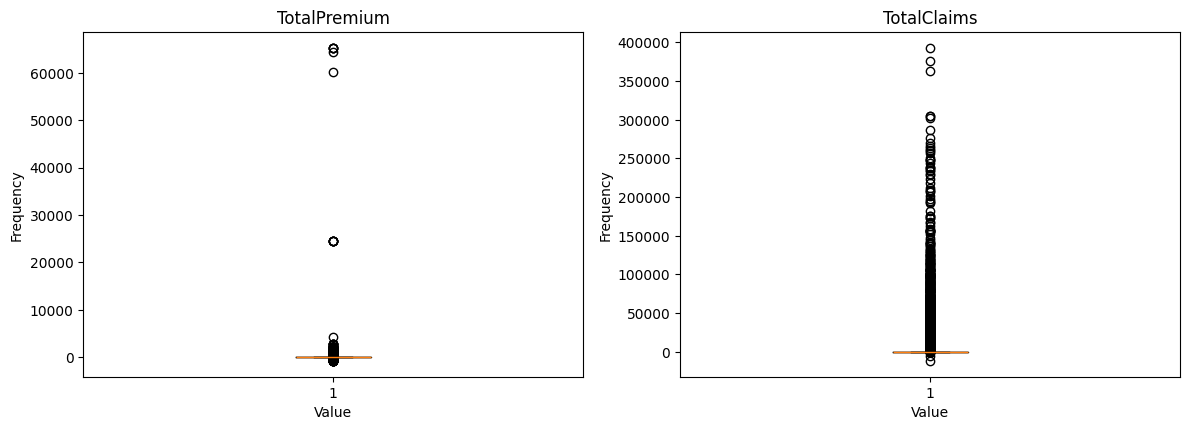

In [20]:
## Detect outliers
dp.outlier_detection()

## Bivariate Analysis

In [21]:
# Create premium to claims feature
df['PremiumToClaimsRatio'] = df['TotalPremium'] / (df['TotalClaims'] + 1)  # +1 to avoid division by zero

In [22]:
## Initialize the Data Analysis Class
da = eda.DataAnalysis(df)

 Premium to Claims Ratio calculated per IsVATRegistered :
   IsVATRegistered  PremiumToClaimsRatio
0            False             60.737457
1             True             49.301559


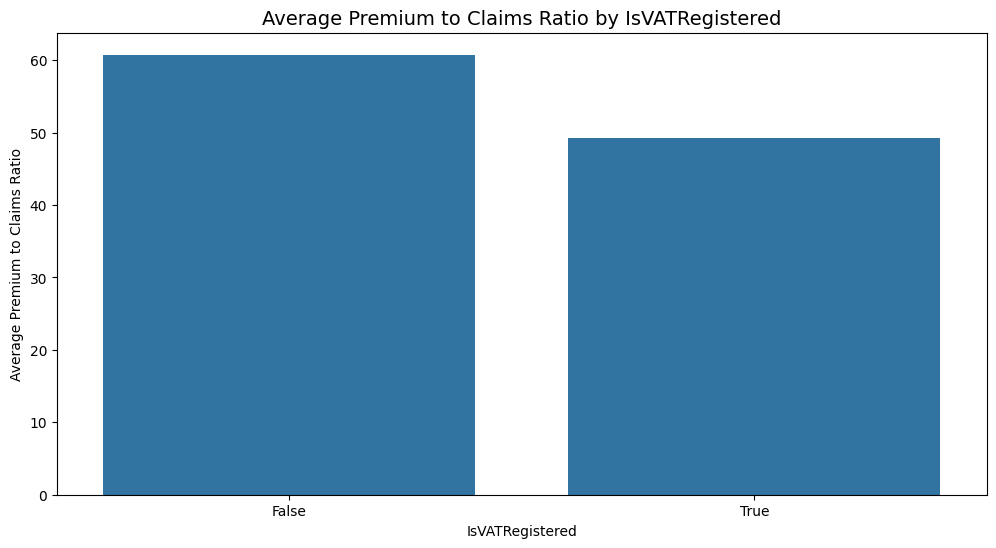

In [23]:
da.bivariate_analysis("IsVATRegistered")

 Premium to Claims Ratio calculated per Citizenship :
  Citizenship  PremiumToClaimsRatio
3          ZW             82.812884
1          AF             62.190731
0                         61.050476
2          ZA             57.274938


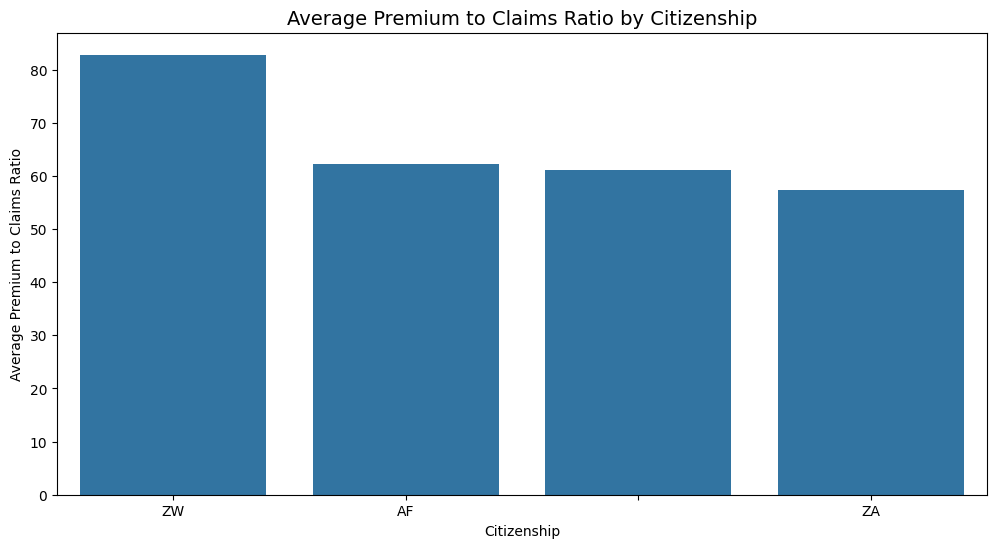

In [24]:
da.bivariate_analysis('Citizenship')

 Premium to Claims Ratio calculated per LegalType :
           LegalType  PremiumToClaimsRatio
5    Sole proprieter            163.144258
4     Public company             96.339619
3    Private company             65.430555
0  Close Corporation             62.108539
1         Individual             60.173011
2        Partnership             42.339308


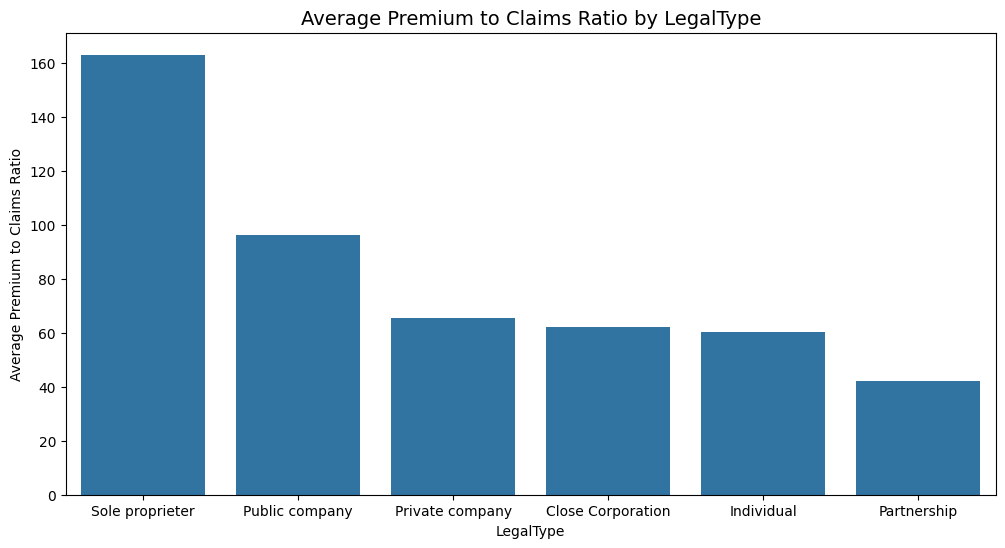

In [25]:
da.bivariate_analysis('LegalType')

 Premium to Claims Ratio calculated per MaritalStatus :
   MaritalStatus  PremiumToClaimsRatio
0        Married             74.985046
1  Not specified             60.798907
2         Single             28.268276


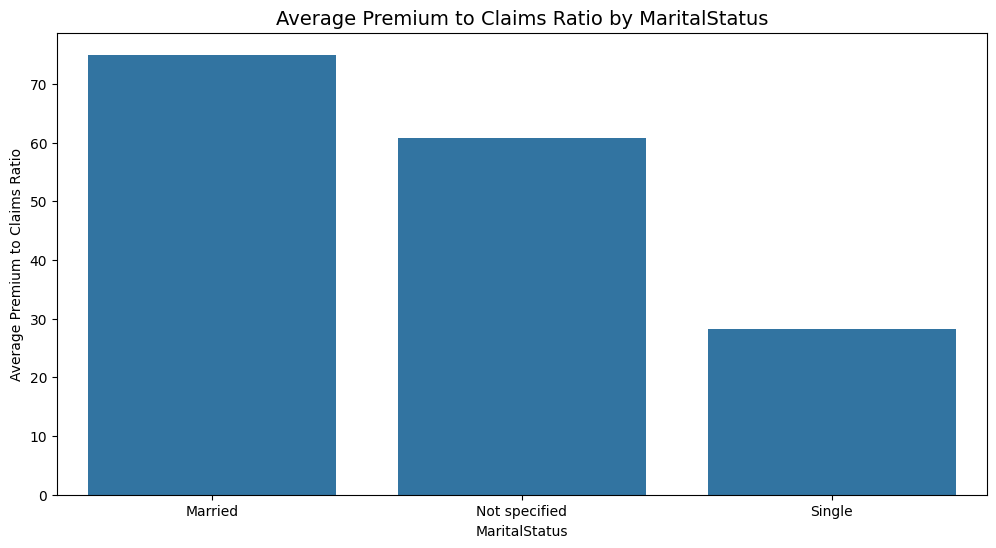

In [26]:
da.bivariate_analysis('MaritalStatus')

 Premium to Claims Ratio calculated per Gender :
          Gender  PremiumToClaimsRatio
2  Not specified             61.885104
0         Female             44.980259
1           Male             36.389337


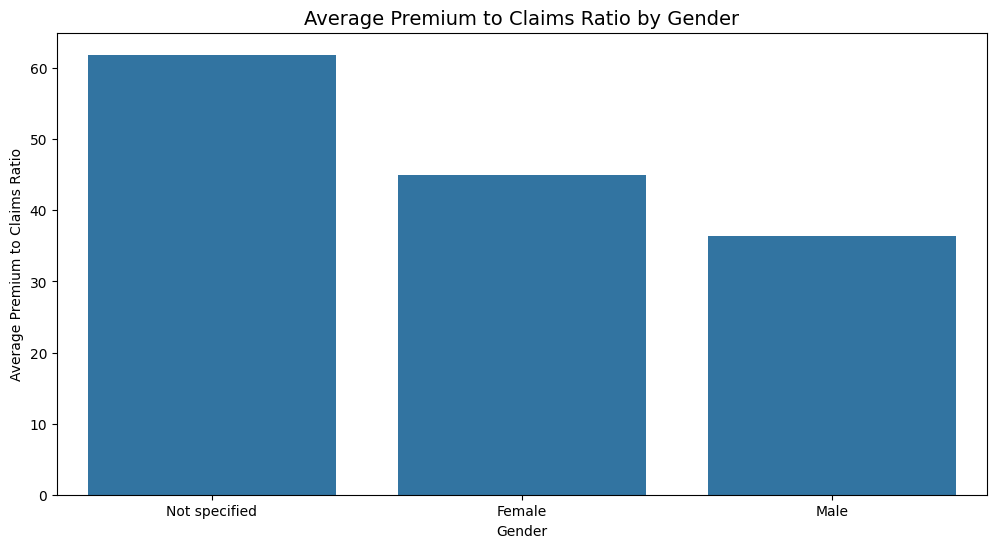

In [27]:
da.bivariate_analysis('Gender')

 Premium to Claims Ratio calculated per Province :
        Province  PremiumToClaimsRatio
3  KwaZulu-Natal             76.532726
0   Eastern Cape             70.021514
1     Free State             64.005798
4        Limpopo             61.530543
2        Gauteng             60.107147
8   Western Cape             54.332951
5     Mpumalanga             53.509314
6     North West             51.850349
7  Northern Cape             49.354012


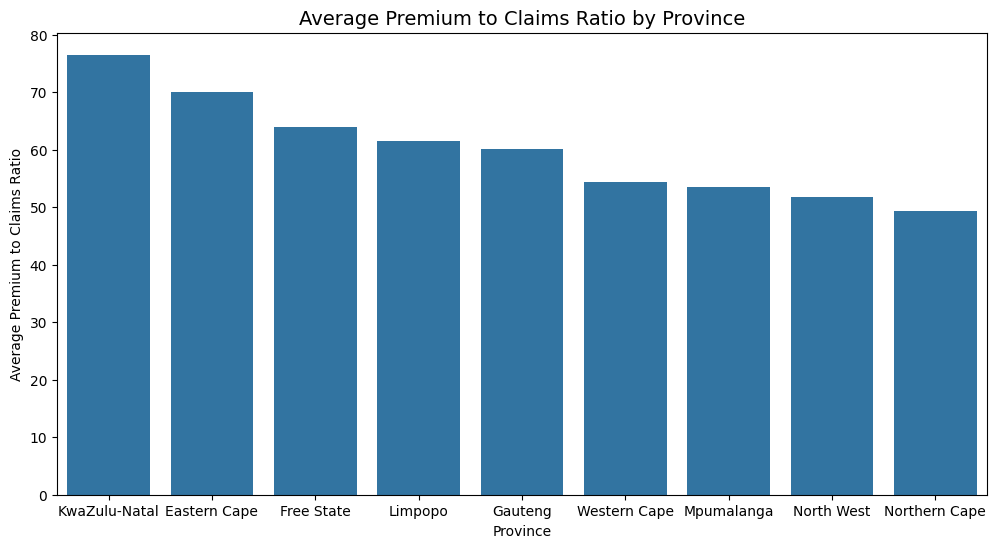

In [28]:

da.bivariate_analysis('Province')

 Premium to Claims Ratio calculated per MainCrestaZone :
                                 MainCrestaZone  PremiumToClaimsRatio
4                                   East London             87.556507
3                            Ciskei, Cape Mid 1             79.729172
9                                Natal (Durban)             79.126599
8                                         Natal             73.908261
13  Tembu 2, Cape Mid 2, Cape Mid West, Tembu 1             66.553472
10                            Oranje Free State             64.687467
5                                  Johannesburg             63.855117
2   Cape Province (East and North of Cape Town)             62.780532
14                         Transvaal (Pretoria)             57.896678
15              Transvaal (all except Pretoria)             54.854383
6              Karoo 1 (Northeast of Cape Town)             54.166492
1                     Cape Province (Cape Town)             53.175668
7                   Langkloof, Co

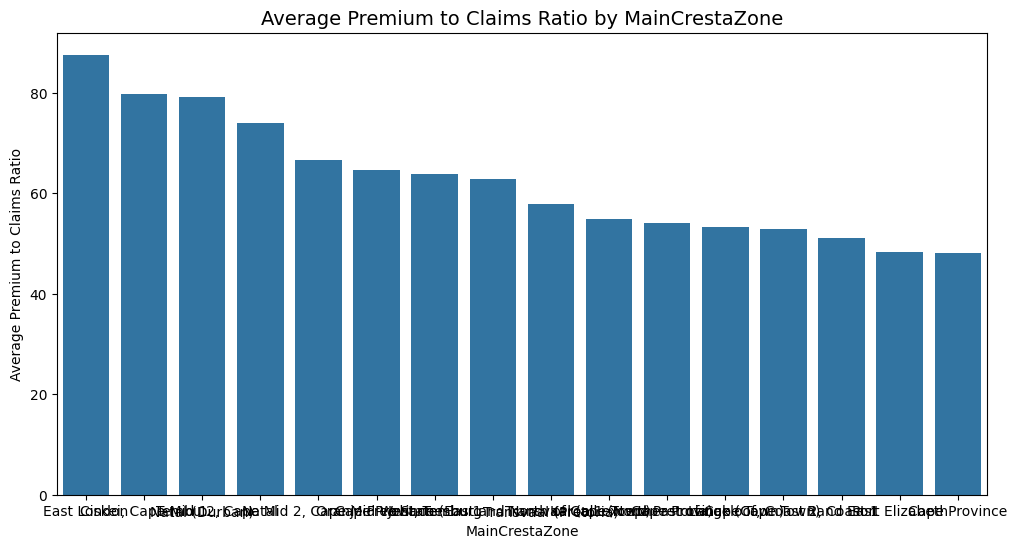

In [29]:
da.bivariate_analysis('MainCrestaZone')


 Premium to Claims Ratio calculated per VehicleType :
         VehicleType  PremiumToClaimsRatio
0                Bus             87.586075
3  Medium Commercial             71.931012
2   Light Commercial             66.605741
1   Heavy Commercial             61.760105
4  Passenger Vehicle             59.976765


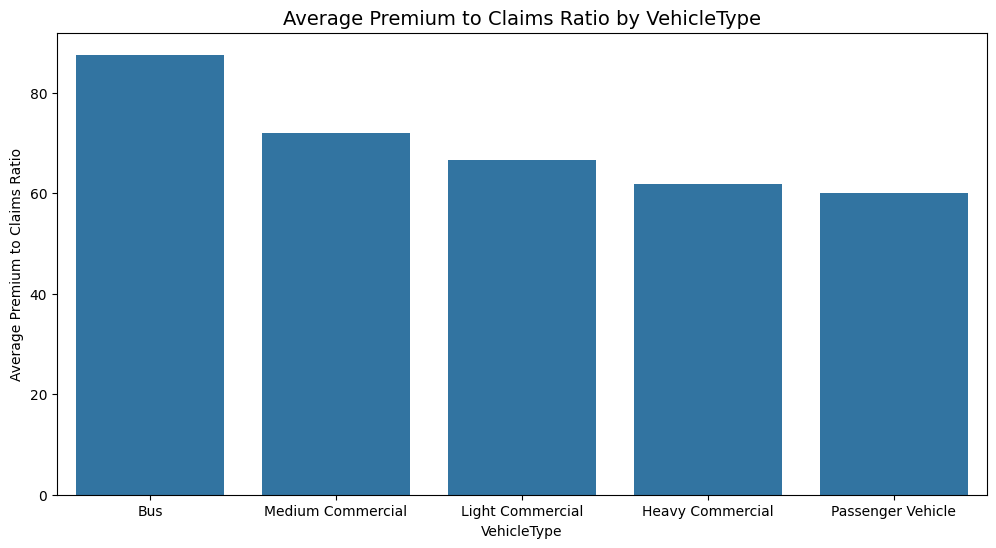

In [30]:
da.bivariate_analysis('VehicleType')

In [31]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'MaritalStatus',
       'Gender', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone',
       'VehicleType', 'RegistrationYear', 'make', 'bodytype', 'NumberOfDoors',
       'AlarmImmobiliser', 'TrackingDevice', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'TotalPremium',
       'TotalClaims', 'PremiumToClaimsRatio'],
      dtype='object')

 Premium to Claims Ratio calculated per Product :
                              Product  PremiumToClaimsRatio
0        Bridge Taxi Finance: Monthly            170.803335
1  Mobility Commercial Cover: Monthly             62.009096
3      Standalone Passenger Liability             41.030356
2     Mobility Metered Taxis: Monthly             38.170512


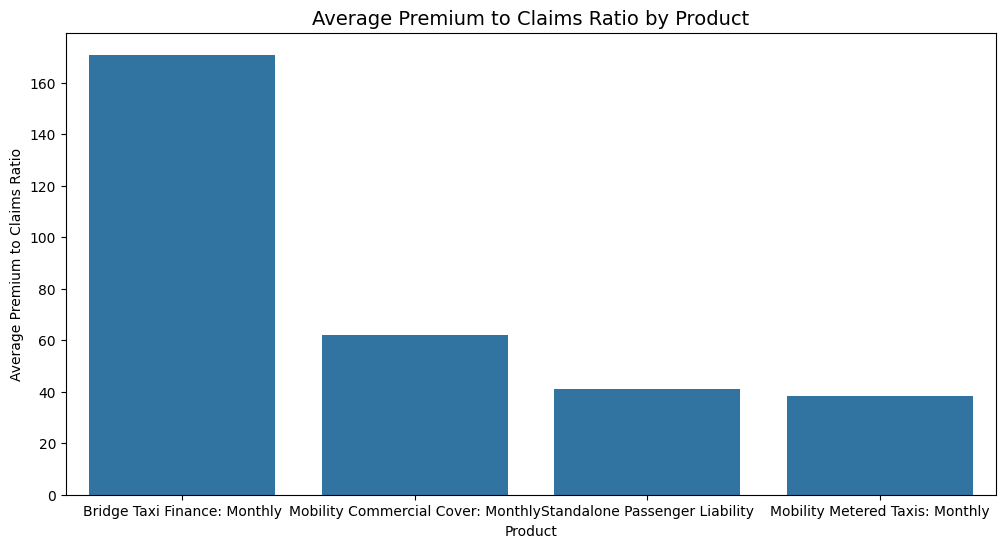

In [32]:
da.bivariate_analysis('Product')

 Premium to Claims Ratio calculated per Section :
                                           Section  PremiumToClaimsRatio
4  Third party or third party, fire and theft only            110.971851
0                                Credit Protection            102.331084
1                              Motor Comprehensive             62.960989
2                         Optional Extended Covers             43.154366
3                   Standalone passenger liability             41.030356


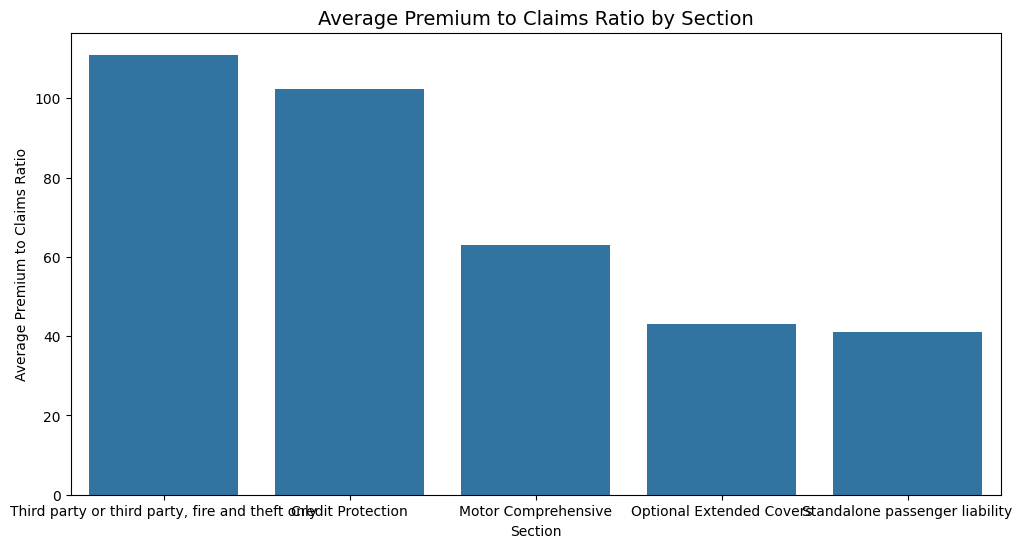

In [33]:
da.bivariate_analysis('Section')

 Premium to Claims Ratio calculated per TermFrequency :
  TermFrequency  PremiumToClaimsRatio
1       Monthly             60.690659
0        Annual             41.030356


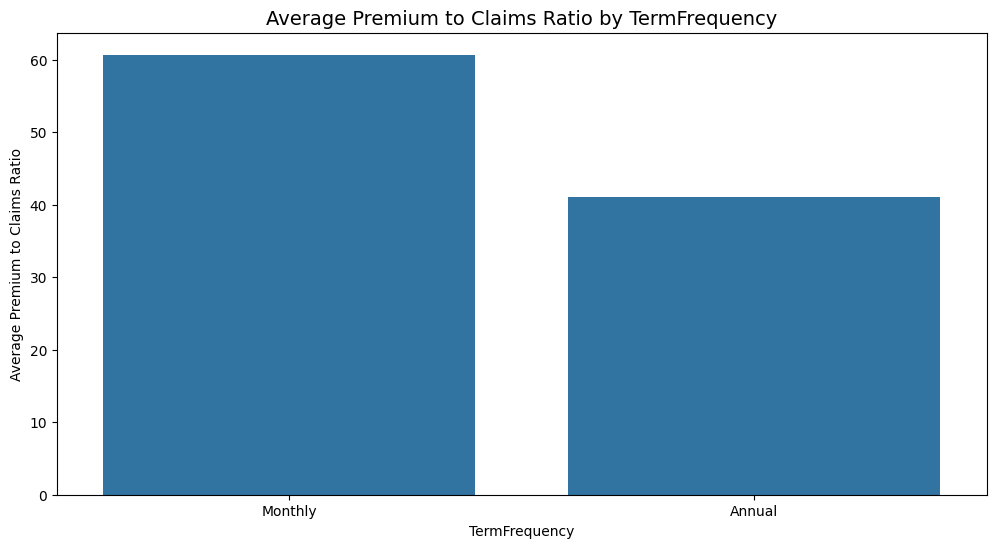

In [34]:
da.bivariate_analysis( 'TermFrequency')

 Premium to Claims Ratio calculated per Converted :
  Converted  PremiumToClaimsRatio
1       Yes            100.137221
0        No             60.676541


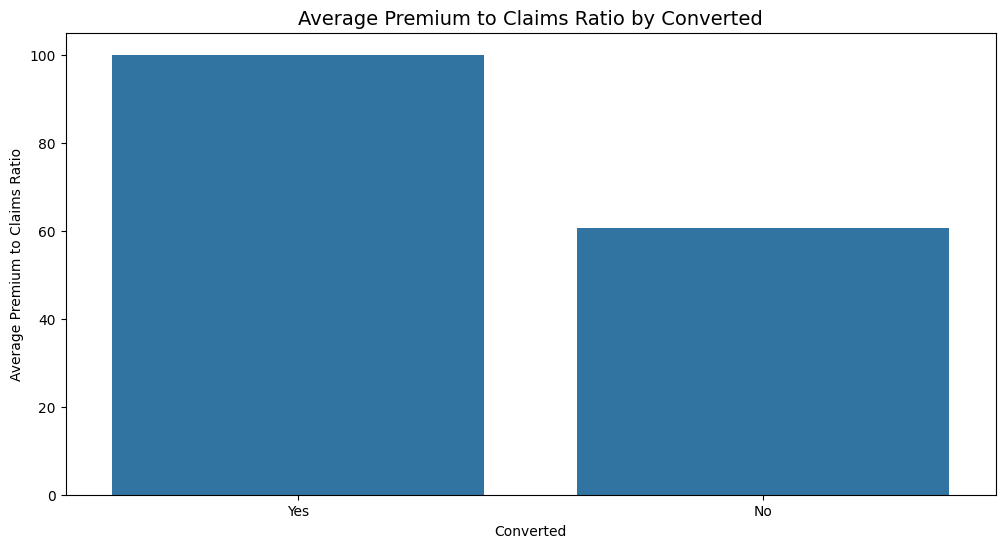

In [35]:
da.bivariate_analysis('Converted')

 Premium to Claims Ratio calculated per Rebuilt :
  Rebuilt  PremiumToClaimsRatio
1     Yes            132.060007
0      No             60.677691


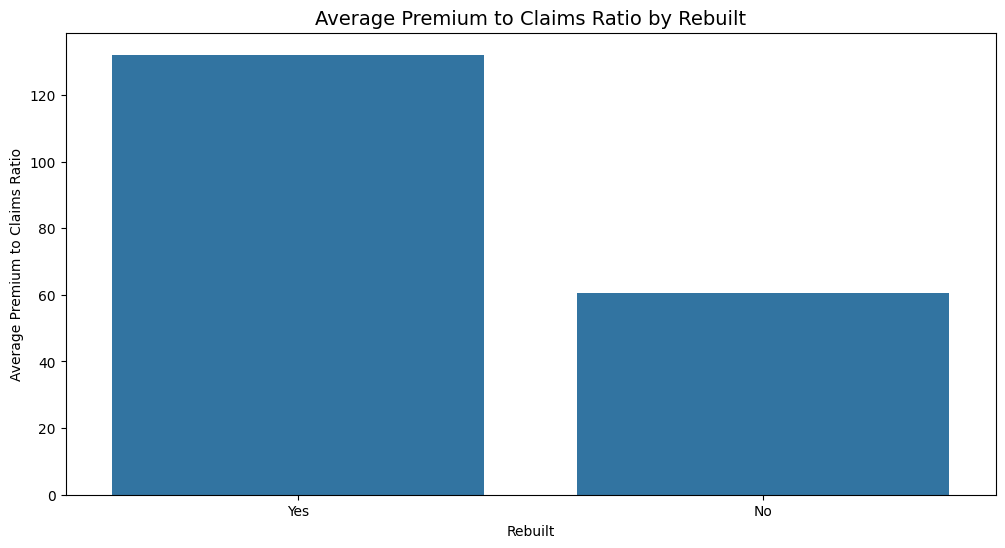

In [36]:
da.bivariate_analysis( 'Rebuilt')

 Premium to Claims Ratio calculated per WrittenOff :
  WrittenOff  PremiumToClaimsRatio
1        Yes            132.060007
0         No             60.677691


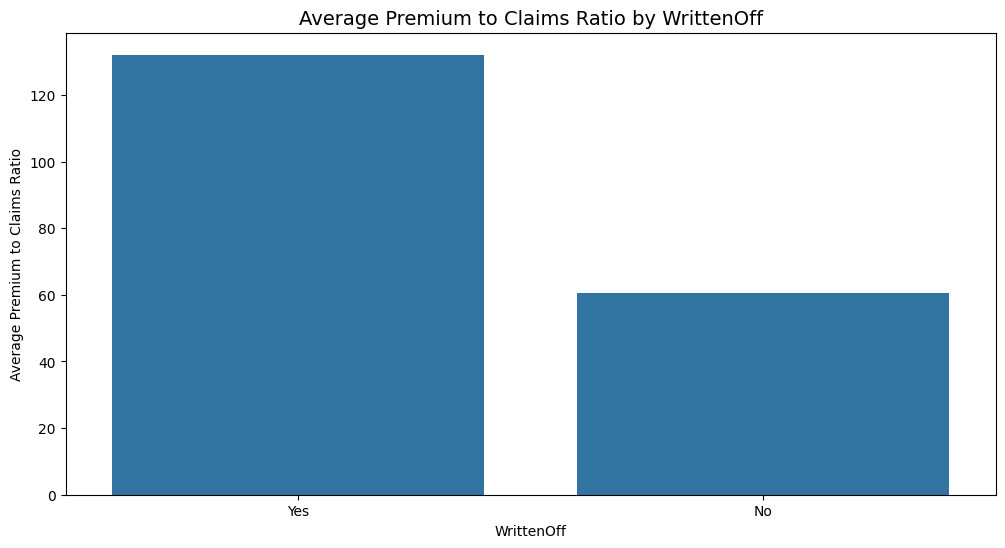

In [37]:
da.bivariate_analysis('WrittenOff')

 Premium to Claims Ratio calculated per NewVehicle :
           NewVehicle  PremiumToClaimsRatio
0  Less than 6 months             94.098091
1  More than 6 months             60.627057


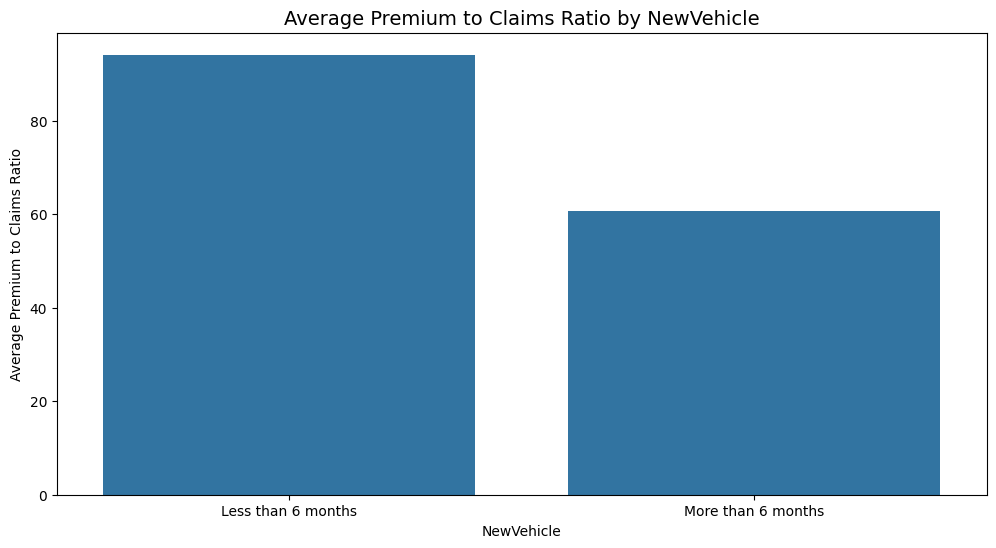

In [38]:
da.bivariate_analysis('NewVehicle')

 Premium to Claims Ratio calculated per TrackingDevice :
  TrackingDevice  PremiumToClaimsRatio
1            Yes             69.030325
0             No             56.317855


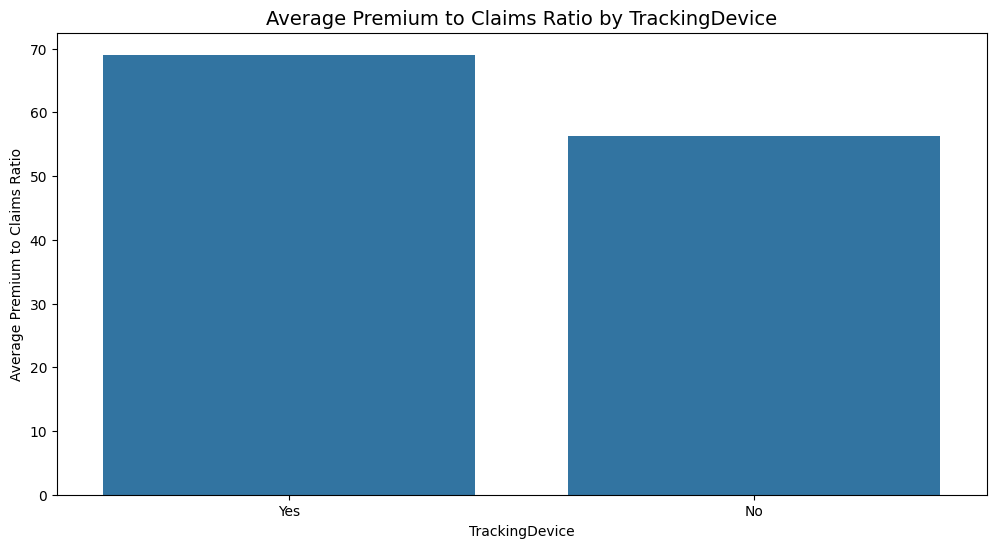

In [39]:
da.bivariate_analysis('TrackingDevice')

 Premium to Claims Ratio calculated per AlarmImmobiliser :
  AlarmImmobiliser  PremiumToClaimsRatio
0               No             66.644574
1              Yes             60.678561


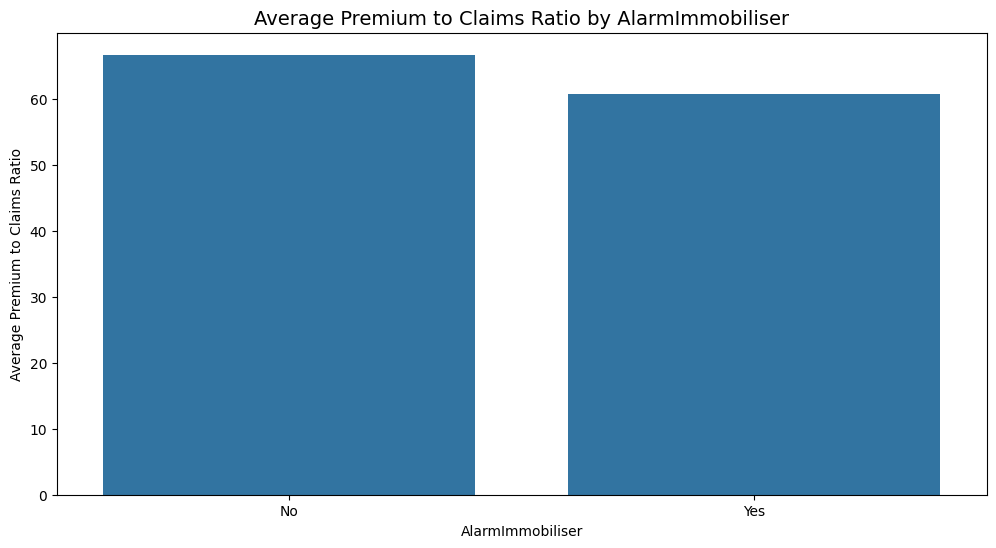

In [40]:
da.bivariate_analysis( 'AlarmImmobiliser')

 Premium to Claims Ratio calculated per NumberOfDoors :
   NumberOfDoors  PremiumToClaimsRatio
1            2.0             62.755986
3            4.0             61.158106
0            0.0             59.710858
4            5.0             55.070554
2            3.0             36.598698
5            6.0             36.588408


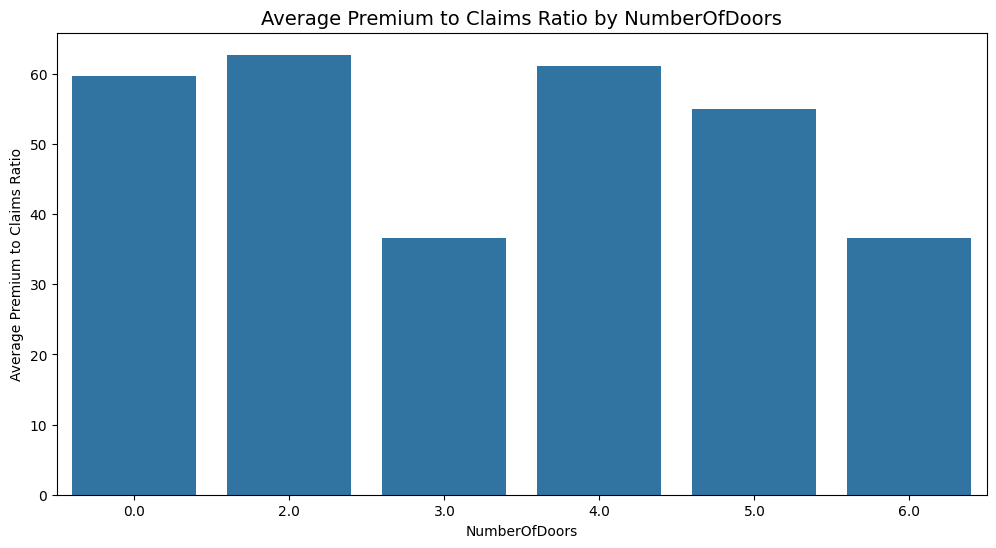

In [41]:
da.bivariate_analysis('NumberOfDoors')

 Premium to Claims Ratio calculated per bodytype :
   bodytype  PremiumToClaimsRatio
2       C/P             78.561752
8       P/V             72.569056
12      SUV             68.720500
0       B/S             62.297276
1       C/C             61.499065
9       S/C             50.072811
11      S/W             47.568841
5       D/S             43.590678
7       MPV             41.447082
10      S/D             35.012633
3       CCL             32.890754
6       H/B             28.849861
4       D/C             22.174062


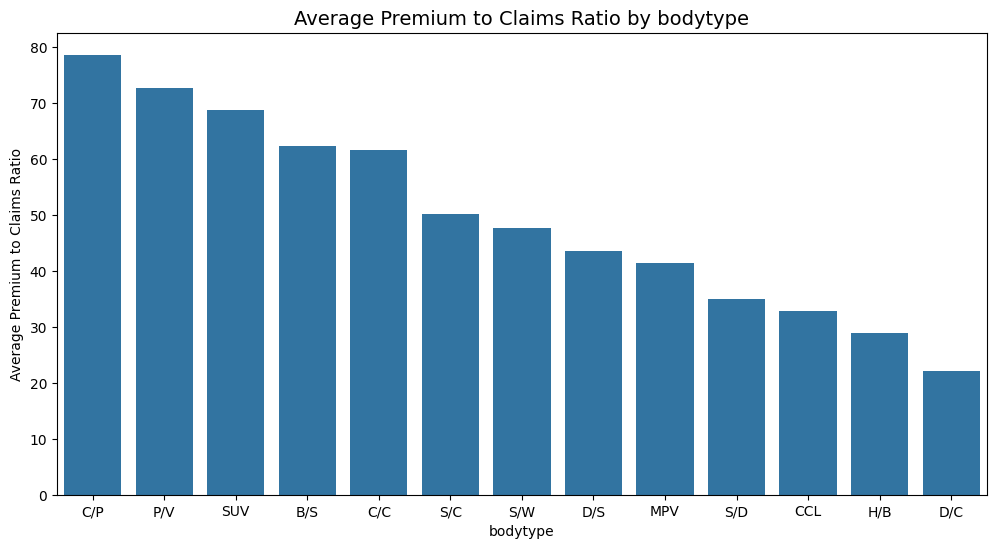

In [42]:
da.bivariate_analysis('bodytype')

In [43]:
corr = df.groupby(['PostalCode','TransactionMonth']).agg({'TotalClaims':'mean','TotalPremium':'mean'}).reset_index()

In [44]:
corr

,PostalCode,TransactionMonth,TotalClaims,TotalPremium
0,1,2013-11-01,843.083333,23.879009
1,1,2013-12-01,0.000000,24.905872
2,1,2014-01-01,0.000000,19.633456
3,1,2014-02-01,0.000000,19.633456
4,1,2014-03-01,0.000000,19.000119
...,...,...,...,...
9701,9870,2015-04-01,0.000000,81.009354
9702,9870,2015-05-01,0.000000,81.009354
9703,9870,2015-06-01,0.000000,81.009354
9704,9870,2015-07-01,0.000000,81.009354


<Axes: xlabel='TotalClaims', ylabel='TotalPremium'>

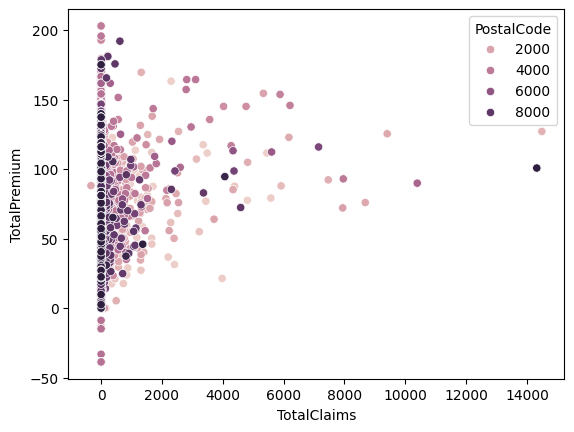

In [45]:
sns.scatterplot(data=corr, x=corr['TotalClaims'],y=corr['TotalPremium'], hue=corr['PostalCode'])

Text(0.5, 1.0, 'Correlation Matrix')

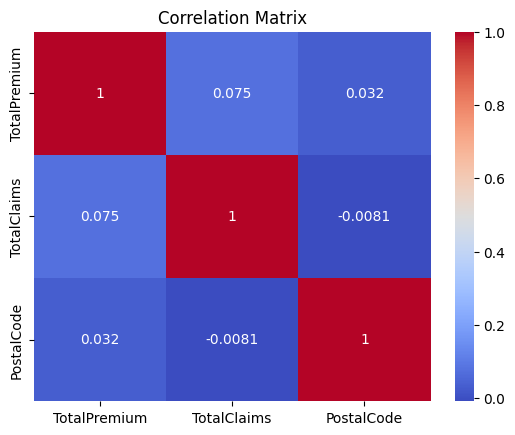

In [46]:
# Correlation matrix
correlation_matrix = corr[['TotalPremium', 'TotalClaims', 'PostalCode']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')